# Assignment8

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from itertools import combinations
import statsmodels.api as sm

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df=pd.read_csv("/content/car_data.csv")

In [3]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
#Defining x as Mileage and y as Price
x=df[['Mileage']]
y=df[['Price']]

In [5]:
#Fitting the data
linreg=linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

Tasks, Part 1 - Solution

In [6]:
#Linear regression equation for this data
print('intercept:',linreg.intercept_)
print('coefficient:',linreg.coef_)

intercept: [24764.55900606]
coefficient: [[-0.1725205]]


Text(0.5, 1.0, 'Mileage vs Price')

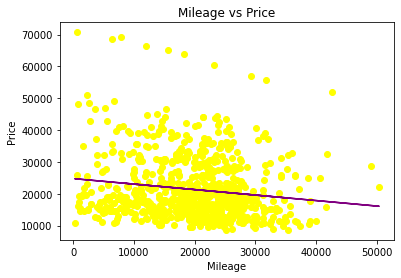

In [7]:
#Chart the original data and the equation on the chart
plt.scatter(x,y,color='yellow')
plt.plot(x,linreg.predict(x),color='purple')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [8]:
#R2-Score
print('R2-Score',linreg.score(x,y))

R2-Score 0.02046344732348926


Tasks, Part 2 - Solution

In [19]:
#Defining the variables
feature=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
x1=df[feature]
y1=df.Price

In [20]:
#Fitting the data
linreg1=linear_model.LinearRegression()
linreg1.fit(x1,y1)

LinearRegression()

In [21]:
#Linear regression equation for this data
print('Features & Coefficients')
print(list(zip([feature],linreg1.coef_)))
print('intercept: ',linreg1.intercept_)

Features & Coefficients
[(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], -0.16974783233303692)]
intercept:  6758.755143598106


In [22]:
#R2-Score
print('r-square: ',linreg1.score(x1,y1))

r-square:  0.4462643536728379
